In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from models import Siamese

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/MNIST_data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/MNIST_data\train-labels-idx1-ubyte.gz
Extracting data/MNIST_data\t10k-images-idx3-ubyte.gz
Extracting data/MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [2]:
import flags
tf.app.flags.DEFINE_string('f', '', 'kernel')
FLAGS = tf.app.flags.FLAGS

In [ ]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('data/MNIST_data', one_hot=False)

In [3]:
tf.reset_default_graph()

siamese = Siamese()
saver = tf.train.Saver()
with tf.Session() as sess:
    saver.restore(sess, FLAGS.siamese_model)

    feed_shape = [-1, FLAGS.h, FLAGS.w, FLAGS.c]
    x1, y1 = mnist.test.next_batch(FLAGS.siamese_batch)
    x2, y2 = mnist.test.next_batch(FLAGS.siamese_batch)
    x1 = x1.reshape(feed_shape)
    x2 = x2.reshape(feed_shape)
    y_true = (y1 == y2)

    d = sess.run(siamese.inference, feed_dict={
        siamese.x1: x1,
        siamese.x2: x2,
        siamese.keep_prob: 1.0,
    })
d.shape

INFO:tensorflow:Restoring parameters from model/siamese/model


(128,)

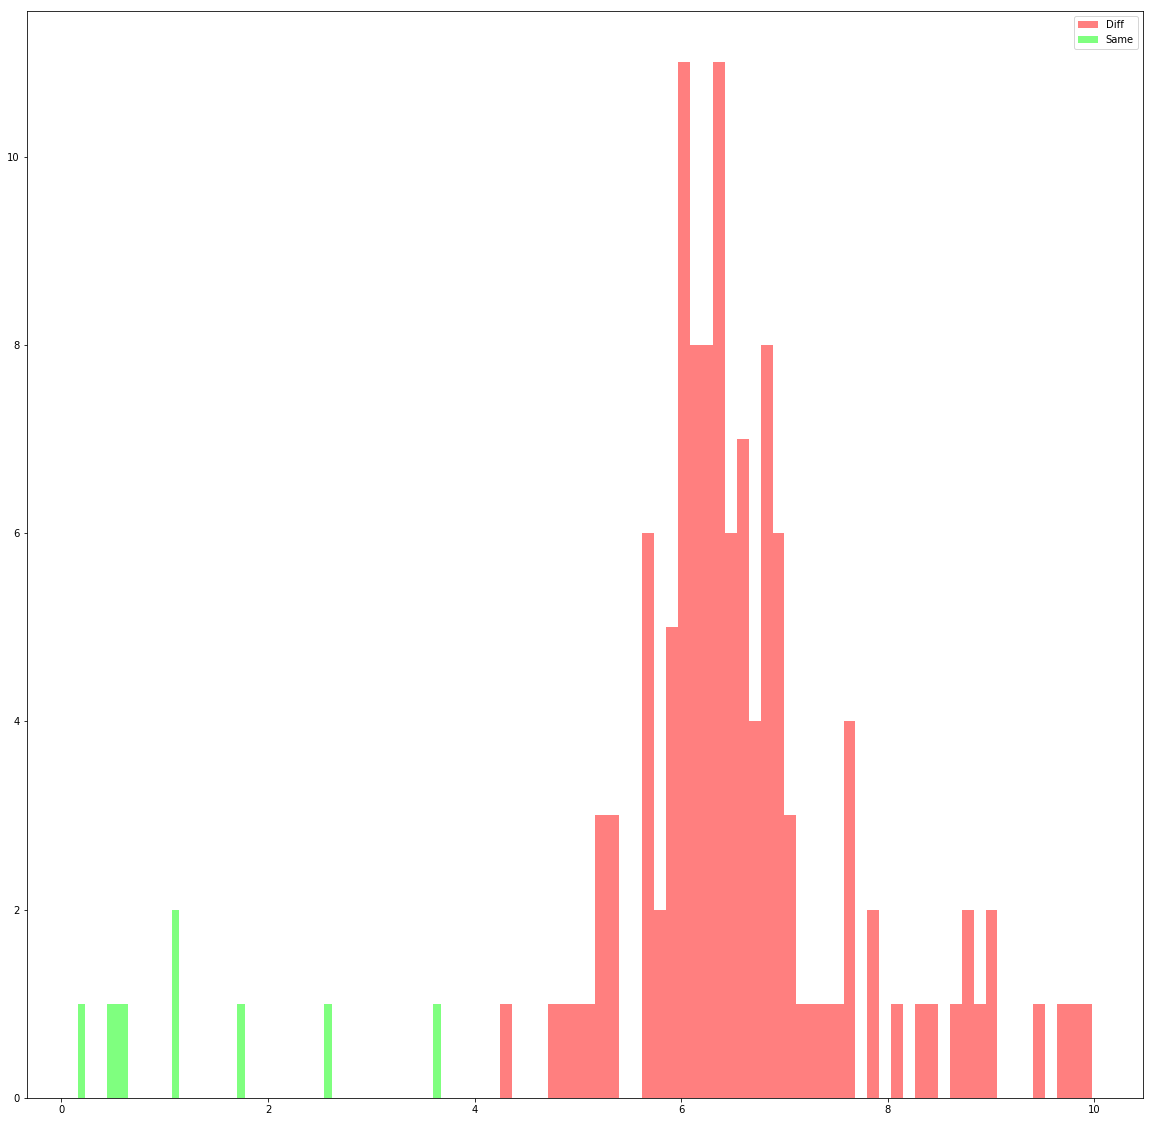

In [4]:
y_pred = d < 0.5

plt.figure(figsize=(20, 20))
plt.hist(d[y_true == 0], color=(1, 0, 0, 0.5), label='Diff', bins=50)
plt.hist(d[y_true == 1], color=(0, 1, 0, 0.5), label='Same', bins=50)
plt.legend();